<a href="https://colab.research.google.com/github/a1kayda/RF_fingerprinting/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
colnames = ["S_Mean", "S_Max-Min", "S_Max-|Min|", "S_sumYup - sumYdn", "S_(Max-Mean)/(Mean-Min))", "S_numYup - numYdn", 
            "S_maxBd", "S_RangeJDy", "S_F", 
            "L_Mean", "L_Max-Min", "L_Max-|Min|", "L_sumYup - sumYdn", "L_(Max-Mean)/(Mean-Min))", "L_numYup - numYdn", 
            "L_maxBd", "L_RangeJDy", "L_F", "L_Ph",
            "y"]

phase_colnames = []
abs_colnames = []
imag_colnames = []
real_colnames = []
for f_name in colnames:
    phase_colnames.append(f_name + "_phase")
    abs_colnames.append(f_name + "_abs")
    real_colnames.append(f_name + "_real")
    imag_colnames.append(f_name + "_imag")

data_abs = pd.read_csv('/content/drive/MyDrive/Alkayda/Multipath_dataset_ABS_no_CFO_comp.txt', sep=",", names=abs_colnames, header=None)
data_angle = pd.read_csv('/content/drive/MyDrive/Alkayda/Multipath_dataset_PHASE_no_CFO_comp.txt', sep=",", names=phase_colnames, header=None)

data_abs.reset_index(drop=True, inplace=True)
data_angle.reset_index(drop=True, inplace=True)

data = pd.concat([data_abs.drop("y_abs", axis=1), data_angle], axis=1)


data = data.replace([np.inf, -np.inf, np.nan], 0)

#data.reset_index()

#data.describe()

In [ ]:
X = np.array(data.drop("y_phase", axis=1))
y = np.array(data ["y_phase"]) - 2

In [ ]:
# X_pca = PCA(n_components=3600).fit_transform(X)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, cmap='autumn')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 55,
                                                        test_size = 0.3, shuffle=True, stratify=y)

In [ ]:
DT = DecisionTreeClassifier(random_state=60)
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7579710144927536


In [ ]:
rf = RandomForestClassifier(n_estimators=300, criterion= "entropy", random_state=29)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9


<function matplotlib.pyplot.show>

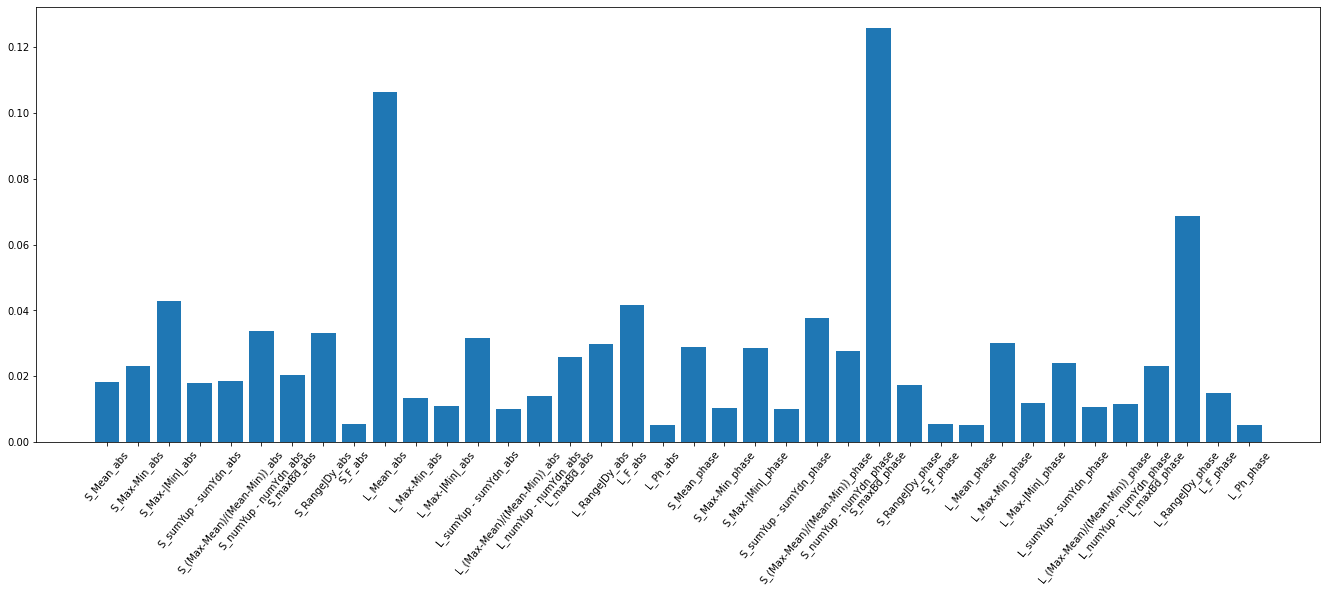

In [ ]:
plt.figure(figsize=(23,8))
plt.bar(data.columns[:-1], rf.feature_importances_)
plt.xticks(rotation=50)
plt.show

In [ ]:
# data.columns[np.append(rf.feature_importances_ > 0.04, False)]

Index(['S_Max-|Min|_abs', 'L_Mean_abs', 'L_F_abs', 'S_maxBd_phase',
       'L_RangeJDy_phase'],
      dtype='object')

In [ ]:
# X_nm = [X[:,rf.feature_importances_ > n*0.001] for n in range(1, 38, 2)]

In [ ]:
rf_1 = RandomForestClassifier(n_estimators=300, criterion= "entropy")
acc = []
for i in np.arange(0.01,0.06,0.0005):
      X_i = data[data.columns[np.append(rf.feature_importances_ > i, False)]]
      scaler.fit(X_i)
      X_train, X_test, y_train, y_test = train_test_split(X_i, y,random_state = 55, test_size = 0.3, shuffle=True, stratify=y)
      rf_1.fit(X_train, y_train)
      y_pred = rf_1.predict(X_test)
      acc.append(accuracy_score(y_test, y_pred))


ValueError: ignored

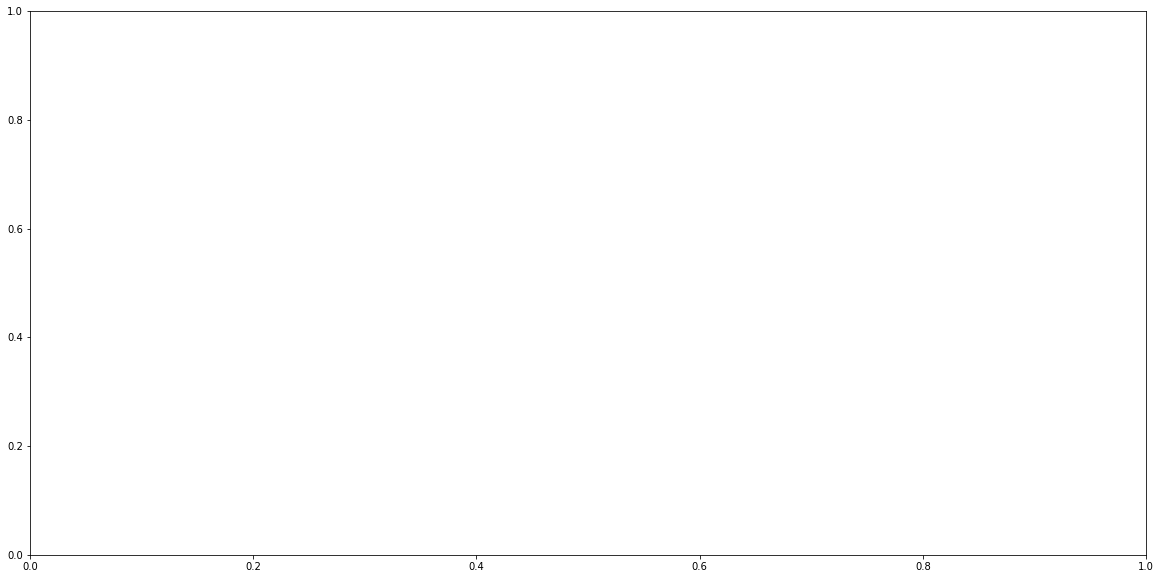

In [ ]:
plt.figure(figsize=(20,10))
plt.plot( [np.shape(data.columns[np.append(rf.feature_importances_ > i, False)]) for i in np.arange(0.005,0.1,0.005)], acc)
plt.grid(True)
plt.show

In [ ]:
X = data[data.columns[np.append(rf.feature_importances_ > i, False)]]
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 55,
                                                        test_size = 0.3, shuffle=True, stratify=y)

In [ ]:
clustering = DBSCAN(eps=0.223, n_jobs=-1)
prediction = clustering.fit_predict(X_cutted)
pred = prediction[np.argwhere(y == 1)]
print(np.unique(clustering.labels_))

[-1  0  1  2  3  4  5  6  7  8]


6


In [ ]:
# from sklearn.model_selection import cross_validate, StratifiedShuffleSplit

# cv = StratifiedShuffleSplit(n_splits=5, random_state=3)
# score = cross_validate(rf, X_train, y_train, cv=cv, scoring='accuracy', return_train_score=True)
# print('rf', 'mean test score :', round(np.mean(score['test_score']),3), '\n', 'train scores:', score['train_score'],  '\n', 'test scores:', score['test_score'], '\n')

In [ ]:
# from sklearn.neural_network import MLPClassifier
# MLP = MLPClassifier(activation = 'relu', max_iter = 300, solver='adam', alpha=3e-4,
#                         hidden_layer_sizes=(37, 250), random_state=10)
# MLP.fit(X_train,y_train)

# y_pred = MLP.predict(X_train)
# acc = accuracy_score(y_train, y_pred)
# print(acc)

# y_pred = MLP.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# print(acc)

# from sklearn.neural_network import MLPClassifier

# import torch
# import torch.nn as nn
# import torchsummary
# device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path, 
#                                                         train=True, 
#                                                         transform=train_transform,
#                                                         target_transform=None,
#                                                         download=download)
# fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path, 
#                                                        train=False, 
#                                                        transform=test_transform,
#                                                        target_transform=None,
#                                                        download=download)
# train_loader = torch.utils.data.DataLoader(fmnist_dataset_train, 
#                                            batch_size=128,
#                                            shuffle=True,
#                                            num_workers=2)
# test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
#                                           batch_size=256,
#                                           shuffle=False,
#                                           num_workers=2)

# class TinyNeuralNetwork(nn.Module):
#     def __init__(self, input_shape=28*28, num_classes=10, input_channels=1, hidden_layer_size=(4096, 2048)):
#         super(self.__class__, self).__init__()
#         self.model = nn.Sequential(
#             nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
#             # Your network structure comes here
#             nn.Linear(input_shape, hidden_layer_size[0]),
#             nn.Dropout(),
#             nn.ELU(),
#             nn.Linear(hidden_layer_size[0], hidden_layer_size[1]),
#             nn.Dropout(),
#             nn.ELU(),
#             nn.Linear(hidden_layer_size[1], num_classes),
#             nn.Dropout(),
#             nn.LogSoftmax(dim=1)
#         )
        
#     def forward(self, inp):       
#         out = self.model(inp)
#         return out

# torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

# model = TinyNeuralNetwork().to(device)
# opt = torch.optim.Adam(model.parameters(), lr=0.0001)
# loss_func = nn.functional.nll_loss

# num_epochs = 60
# def error(loader, model):
#     model.eval()
#     correct = 0
#     with torch.no_grad():
#         for data, target in loader:
#             data, target = data.to(device), target.to(device)
#             output = model(data)
#             pred = output.argmax(dim=1, keepdim=True)
#             correct += pred.eq(target.view_as(pred)).sum().item()

#     return 1 - correct / len(loader.dataset)

# epoch_train_accs, epoch_test_accs = [], []
# for epoch in range(num_epochs):
#     epoch_train_accs.append(error(train_loader, model))
#     epoch_test_accs.append(error(test_loader, model))

#     clear_output(True)
#     plt.plot(np.arange(len(epoch_train_accs)), epoch_train_accs, label='train error')
#     plt.plot(np.arange(len(epoch_test_accs)), epoch_test_accs, label='test error')
#     plt.legend()
#     plt.show()

#     model.train()
#     correct = 0
#     for data, target in train_loader:
#         opt.zero_grad()
#         output = model(data.to(device))
#         loss = loss_func(output.to(device), target.to(device))
#         loss.backward()
#         opt.step()

# print(f'Train accuracy: {1 - error(train_loader, model)}')
# print(f'Test accuracy: {1 - error(test_loader, model)}')